In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_excel('train_modellhez.xlsx')
df_train.head()

,Unnamed: 0,AT,V,AP,RH,PE
0,0,10.54,34.03,1018.71,74.00,478.77
1,1,7.08,39.99,1010.55,91.44,482.83
2,2,14.49,41.16,1000.50,82.17,465.24
3,3,10.73,25.36,1009.35,100.15,469.43
4,4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
df_train = df_train.iloc[:, 1:]
df_train.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
df_test = pd.read_excel('Test.xlsx')
df_test.head()

,AT,V,AP,RH,PE
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [ ]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:, -1]
y_train

0       478.77
1       482.83
2       465.24
3       469.43
4       442.50
         ...  
8527    457.32
8528    446.92
8529    429.34
8530    421.57
8531    454.41
Name: PE, Length: 8532, dtype: float64

In [ ]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:, -1]
y_test

0      481.30
1      465.36
2      465.48
3      467.05
4      463.58
        ...  
995    439.20
996    460.53
997    458.26
998    440.88
999    457.05
Name: PE, Length: 1000, dtype: float64

Lineáris regresszió

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(reg.coef_)

[-1.97017885 -0.23915453  0.05992997 -0.15756272]


In [ ]:
pd.DataFrame(reg.coef_, df_train.columns[:-1], columns=['reg_coef'])

,reg_coef
AT,-1.970179
V,-0.239155
AP,0.059930
RH,-0.157563


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_p_train = reg.predict(X_train)
y_p_test = reg.predict(X_test)

In [ ]:
MAE_train = mean_absolute_error(y_train, y_p_train)
MAE_test = mean_absolute_error(y_test, y_p_test)
print([MAE_train, MAE_test])

[3.6395420901689732, 3.49668211800507]


In [ ]:
MSE_train = mean_squared_error(y_train, y_p_train)
MSE_test = mean_squared_error(y_test, y_p_test)
print([MSE_train, MSE_test])

[21.027376714980324, 18.597521827581364]


In [ ]:
r2_score(y_train, y_p_train)

0.9279718087750015

In [ ]:
r2_score(y_test, y_p_test)

0.9323698221839516

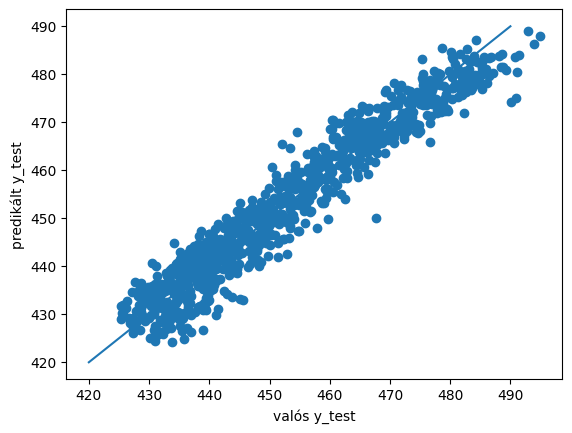

In [ ]:
plt.scatter(y_test, y_p_test)
plt.plot(np.arange(420,500,10), np.arange(420,500,10))
plt.xlabel('valós y_test')
plt.ylabel('predikált y_test')
plt.savefig('linear_regression1.png')


In [ ]:
r2_train = r2_score(y_train, y_p_train)
N = X_train.shape[0]
K = X_train.shape[1]

adj_r2_train = 1-(1-r2_train)*((N-1)/(N-K))
adj_r2_train

0.9279464705276194

In [ ]:
r2_test = r2_score(y_test, y_p_test)
N = X_test.shape[0]
K = X_test.shape[1]

adj_r2_test = 1-(1-r2_test)*((N-1)/(N-K))
adj_r2_test

0.932166116829084

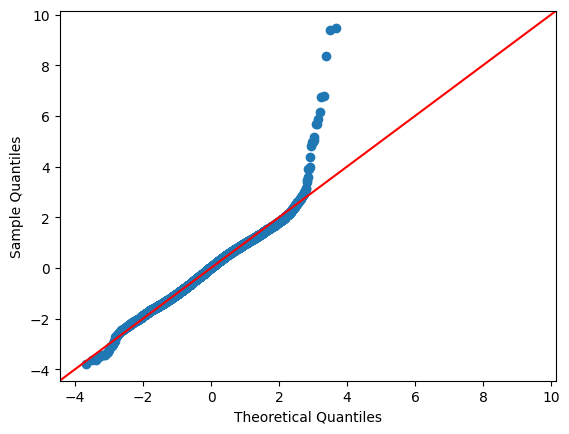

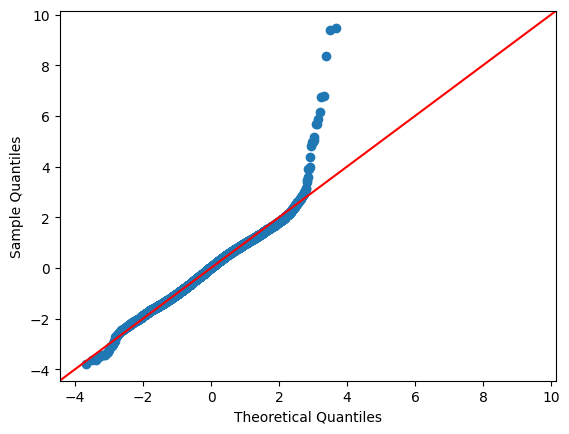

In [ ]:
import statsmodels.api as sm
error = y_p_train - y_train
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

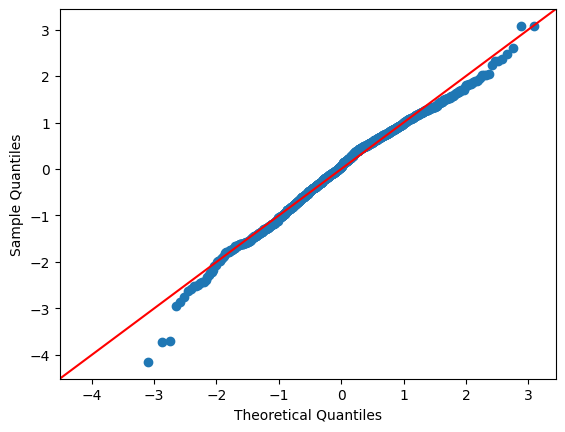

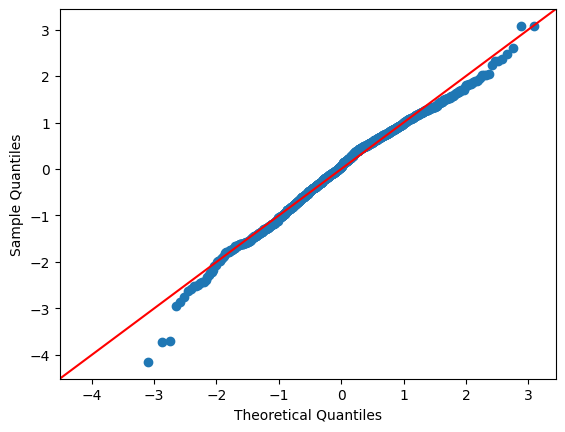

In [ ]:
import statsmodels.api as sm
error = y_p_test - y_test
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.746e+04
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:17:22   Log-Likelihood:                -25100.
No. Observations:                8532   AIC:                         5.021e+04
Df Residuals:                    8527   BIC:                         5.025e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.8959     10.374     44.042      0.0

Polinomiális regresszió

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly_train = poly_reg.fit_transform(X_train)
poly_reg.get_feature_names_out()

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'], dtype=object)

In [ ]:
poly_reg = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly_test = poly_reg.fit_transform(X_test)
poly_reg.get_feature_names_out()

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'], dtype=object)

In [ ]:
reg_pol = LinearRegression()
reg_pol.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(reg_pol.coef_, poly_reg.get_feature_names_out(), columns=['reg_coef'])

,reg_coef
1,0.000000
AT,-7.853406
V,-2.069515
AP,15.270645
RH,3.736308
AT^2,0.017838
AT V,0.010414
AT AP,0.005182
AT RH,-0.006112
V^2,-0.000846


In [ ]:
y_p_poly_train = reg_pol.predict(X_poly_train)
y_p_poly_test = reg_pol.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE_poly_train = mean_absolute_error(y_train, y_p_poly_train)
MAE_poly_test = mean_absolute_error(y_test, y_p_poly_test)
print([MAE_poly_train, MAE_poly_test])

[3.367645661946039, 3.2412465394055237]


In [ ]:
MSE_poly_train = mean_squared_error(y_train, y_p_poly_train)
MSE_poly_test = mean_squared_error(y_test, y_p_poly_test)
print([MSE_poly_train, MSE_poly_test])

[18.342056102850044, 16.309962155500795]


In [ ]:
r2_score(y_train, y_p_poly_train)

0.9371702356245645

In [ ]:
r2_score(y_test, y_p_poly_test)

0.9406885685643531

Text(0, 0.5, 'predikált y_test')

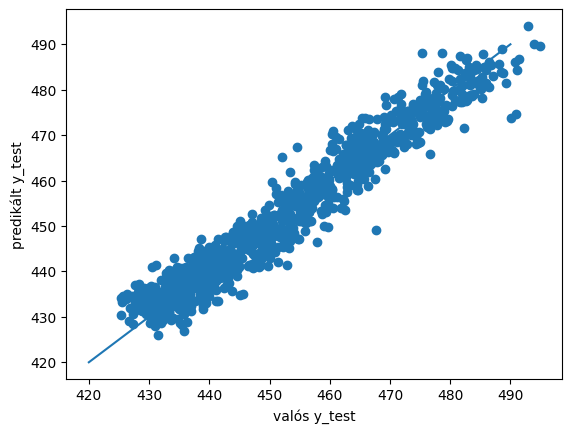

In [ ]:
plt.scatter(y_test, y_p_poly_test)
plt.plot(np.arange(420,500,10), np.arange(420,500,10))
plt.xlabel('valós y_test')
plt.ylabel('predikált y_test')

In [ ]:
r2_poly_train = r2_score(y_train, y_p_poly_train)
N = X_poly_train.shape[0]
K = X_poly_train.shape[1]

adj_r2_poly_train = 1-(1-r2_poly_train)*((N-1)/(N-K))
adj_r2_poly_train

0.9370669578622942

In [ ]:
r2_poly_test = r2_score(y_test, y_p_poly_test)
N = X_poly_test.shape[0]
K = X_poly_test.shape[1]

adj_r2_poly_test = 1-(1-r2_poly_test)*((N-1)/(N-K))
adj_r2_poly_test

0.9398455634475013

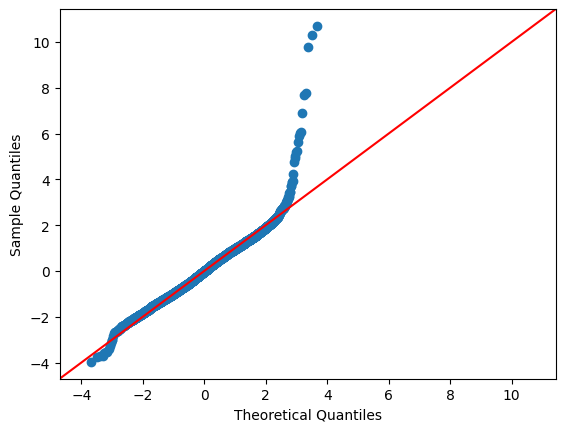

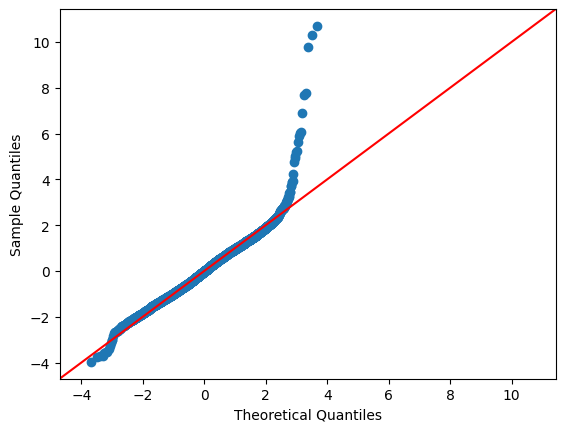

In [ ]:
import statsmodels.api as sm
error = y_p_poly_train - y_train
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

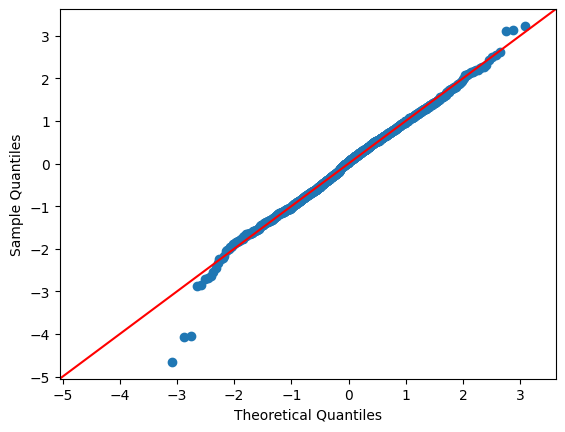

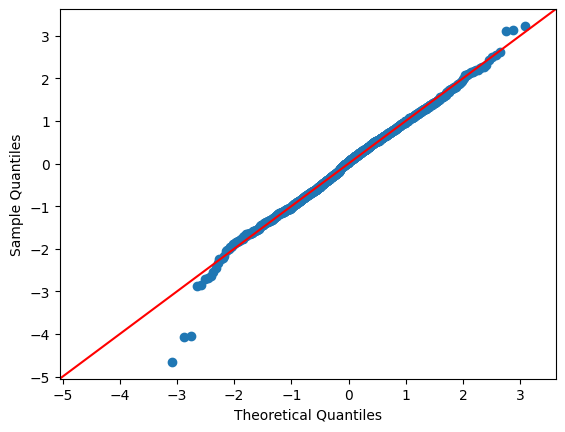

In [ ]:
error = y_p_poly_test - y_test
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

Ridge, lasso, elastic net

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_train = StandardScaler()
X_poly_train_sc = scaler_train.fit_transform(X_poly_train)
scaler_test = StandardScaler()
X_poly_test_sc = scaler_test.fit_transform(X_poly_test)

In [ ]:
ridge_reg = Ridge(alpha=1)
ridge_reg

Ridge(alpha=1)

In [ ]:
ridge_reg.fit(X_poly_train, y_train)
y_ridge_pred = ridge_reg.predict(X_poly_train)

In [ ]:
ridge_reg.coef_

array([ 0.00000000e+00, -7.26742360e+00, -2.85622741e+00,  1.23965471e+01,
        3.64655832e+00,  1.71094729e-02,  1.10462967e-02,  4.60401016e-03,
       -6.20546719e-03, -9.64592513e-04,  2.37109455e-03,  5.14760891e-04,
       -6.03911064e-03, -3.34529465e-03, -1.93533893e-03])

In [ ]:
alpha_array = np.linspace(0, 100, 100)

r2_train = []
r2_test = []
params = []
MSE_train = []
MSE_test = []

for alpha in alpha_array:
  clf = Ridge(alpha=alpha)
  clf.fit(X_poly_train_sc, y_train)

  ridge_train_predict = clf.predict(X_poly_train_sc)
  ridge_test_predict = clf.predict(X_poly_test_sc)

  r2_train_temp = r2_score(y_train, ridge_train_predict)
  r2_test_temp = r2_score(y_test, ridge_test_predict)

  MSE_train_temp = mean_squared_error(y_train, ridge_train_predict)
  MSE_test_temp = mean_squared_error(y_test, ridge_test_predict)

  r2_train.append(r2_train_temp)
  r2_test.append(r2_test_temp)
  MSE_train.append(MSE_train_temp)
  MSE_test.append(MSE_test_temp)
  params.append(clf.coef_)

Text(0, 0.5, 'r2')

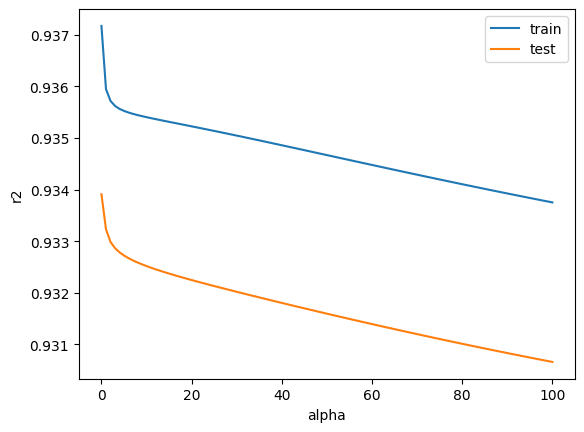

In [ ]:
plt.plot(alpha_array, r2_train, alpha_array, r2_test)
plt.legend(['train', 'test'])
plt.xlabel('alpha')
plt.ylabel('r2')

Text(0, 0.5, 'MSE')

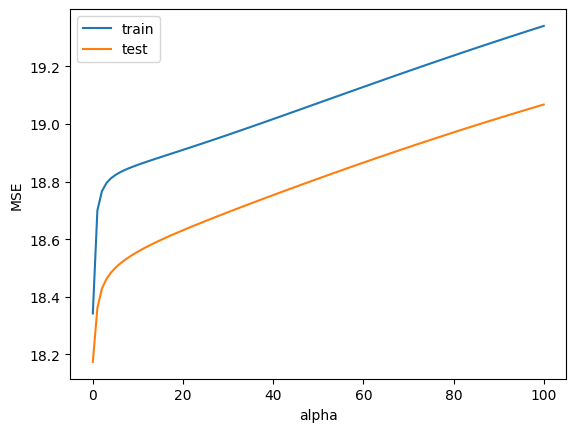

In [ ]:
plt.plot(alpha_array, MSE_train, alpha_array, MSE_test)
plt.legend(['train', 'test'])
plt.xlabel('alpha')
plt.ylabel('MSE')

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alpha_array = np.linspace(0, 100, 100)

r2_train = []
r2_test = []
params = []
MSE_train = []
MSE_test = []

for alpha in alpha_array:
  clf = Lasso(alpha=alpha)
  clf.fit(X_poly_train_sc, y_train)

  lasso_train_predict = clf.predict(X_poly_train_sc)
  lasso_test_predict = clf.predict(X_poly_test_sc)

  r2_train_temp = r2_score(y_train, lasso_train_predict)
  r2_test_temp = r2_score(y_test, lasso_test_predict)

  MSE_train_temp = mean_squared_error(y_train, lasso_train_predict)
  MSE_test_temp = mean_squared_error(y_test, lasso_test_predict)

  r2_train.append(r2_train_temp)
  r2_test.append(r2_test_temp)
  MSE_train.append(MSE_train_temp)
  MSE_test.append(MSE_test_temp)
  params.append(clf.coef_)

<ipython-input-46-fb56bf7c1862>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit(X_poly_train_sc, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.023e+04, tolerance: 2.491e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'r2')

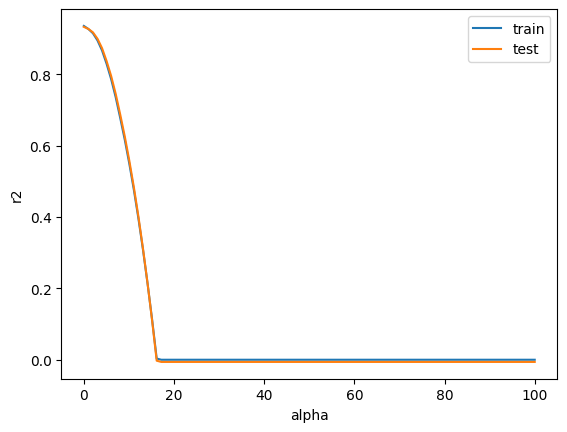

In [ ]:
plt.plot(alpha_array, r2_train, alpha_array, r2_test)
plt.legend(['train', 'test'])
plt.xlabel('alpha')
plt.ylabel('r2')

Text(0, 0.5, 'MSE')

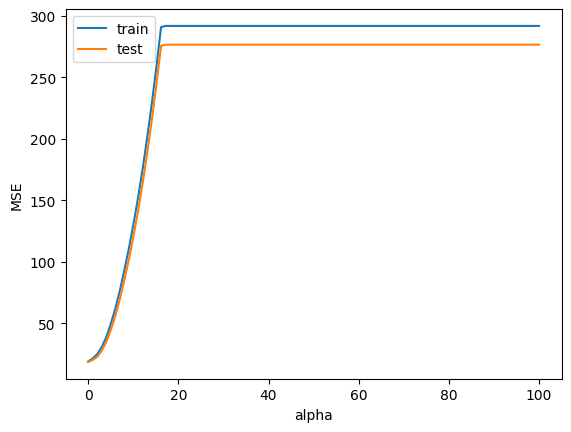

In [ ]:
plt.plot(alpha_array, MSE_train, alpha_array, MSE_test)
plt.legend(['train', 'test'])
plt.xlabel('alpha')
plt.ylabel('MSE')

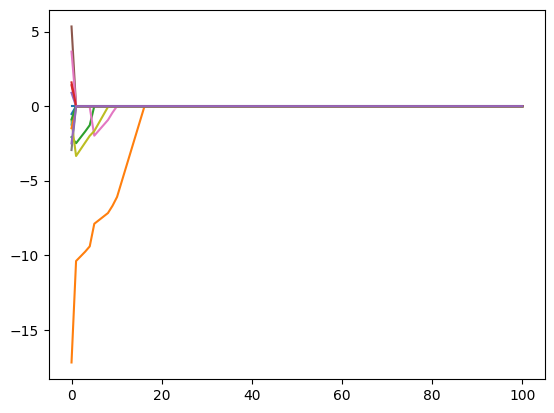

In [ ]:
plt.plot(alpha_array, params)

Keresztvalidálás

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
y_train = y_train.values

In [ ]:
kf = KFold(n_splits=10)
r2_train = []
r2_valid =  []

for train, valid in kf.split(X_poly_train_sc):
  clf = Ridge(alpha=1)
  clf.fit(X_poly_train_sc[train], y_train[train])

  ridge_train_pred = clf.predict(X_poly_train_sc[train])
  ridge_valid_pred = clf.predict(X_poly_train_sc[valid])

  r2_train.append(r2_score(y_train[train], ridge_train_pred))
  r2_valid.append(r2_score(y_train[valid], ridge_valid_pred))

Text(0, 0.5, 'r2')

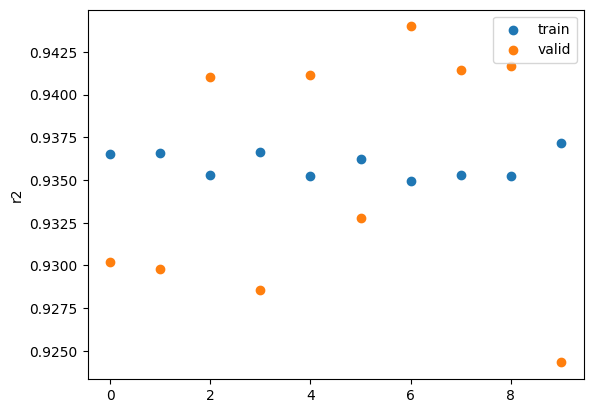

In [ ]:
plt.scatter(range(0,len(r2_train)), r2_train)
plt.scatter(range(0,len(r2_train)), r2_valid)
plt.legend(['train', 'valid'])
plt.ylabel('r2')

Változószelekció

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select='auto', scoring='r2', direction='backward')
sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select='auto', scoring='r2')

In [ ]:
X_train.columns[sfs.get_support()]

Index(['AT', 'RH'], dtype='object')

RBF

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
gauss_proc = GaussianProcessRegressor()
gauss_proc.fit(X_train, y_train)

GaussianProcessRegressor()

In [ ]:
gauss_proc.score(X_train, y_train)

1.0

In [ ]:
gauss_proc.score(X_test, y_test)

-157.4958355947478

In [ ]:
y_p_rbf_train = gauss_proc.predict(X_train)
y_p_rbf_test = gauss_proc.predict(X_test)

In [ ]:
MSE_rbf_train = mean_squared_error(y_train, y_p_rbf_train)
MSE_rbf_test = mean_squared_error(y_test, y_p_rbf_test)
print([MSE_rbf_train, MSE_rbf_test])

[4.321695558408229e-15, 43584.533668852884]


In [ ]:
r2_score(y_train, y_p_rbf_train)

1.0

In [ ]:
r2_score(y_test, y_p_rbf_test)

-157.4958355947478

k-NN regresszió

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg_knn = KNeighborsRegressor() #default 5
reg_knn.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn_train = reg_knn.predict(X_train_sc)

In [ ]:
y_pred_knn_test = reg_knn.predict(X_test_sc)

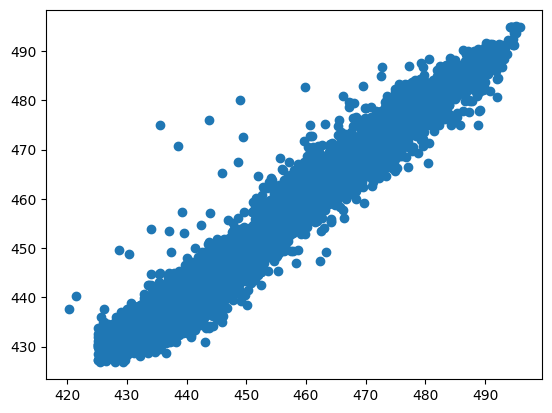

In [ ]:
plt.scatter(y_train, y_pred_knn_train)

In [ ]:
knn_range = range(1,10)
r2_train_list = []
r2_test_list = []

for k in knn_range:
  reg_knn = KNeighborsRegressor(n_neighbors=k) #default 5
  reg_knn.fit(X_train_sc, y_train)

  y_train_pred = reg_knn.predict(X_train_sc)
  y_test_pred = reg_knn.predict(X_test_sc)

  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)

  r2_train_list.append(r2_train)
  r2_test_list.append(r2_test)

Text(0, 0.5, 'r2_score')

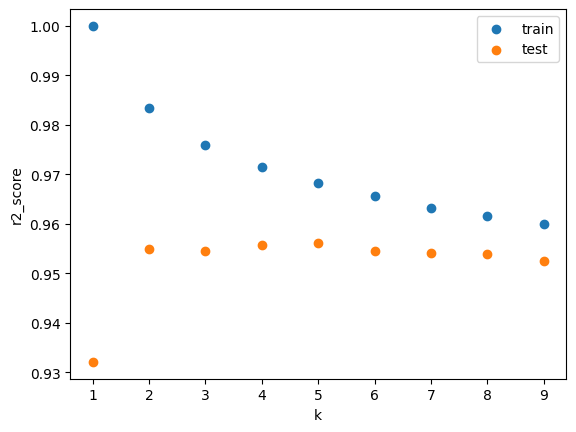

In [ ]:
plt.scatter(list(knn_range), r2_train_list)
plt.scatter(list(knn_range), r2_test_list)
plt.legend(['train', 'test'])
plt.xlabel('k')
plt.ylabel('r2_score')

In [ ]:
reg_knn = KNeighborsRegressor() #default 5
reg_knn.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn_train = reg_knn.predict(X_train_sc)

In [ ]:
y_pred_knn_test = reg_knn.predict(X_test_sc)

In [ ]:
MSE_knn_train = mean_squared_error(y_train, y_pred_knn_train)
MSE_knn_test = mean_squared_error(y_test, y_pred_knn_test)
print([MSE_knn_train, MSE_knn_test])

[9.270565318330991, 12.063322860000003]


In [ ]:
r2_score(y_train, y_pred_knn_train)

0.9682441580533976

In [ ]:
r2_score(y_test, y_pred_knn_test)

0.9561315385115317

Text(0, 0.5, 'predikált y_test')

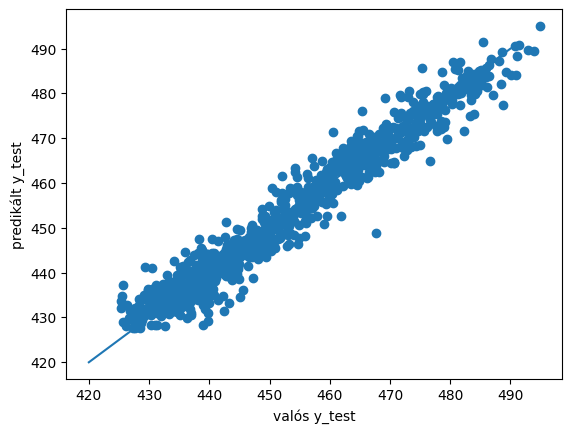

In [ ]:
plt.scatter(y_test, y_pred_knn_test)
plt.plot(np.arange(420,500,10), np.arange(420,500,10))
plt.xlabel('valós y_test')
plt.ylabel('predikált y_test')

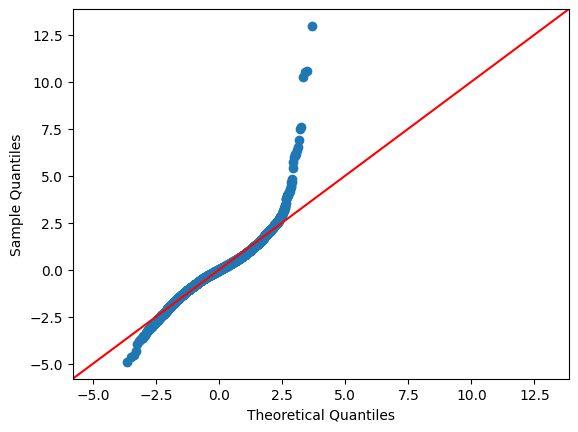

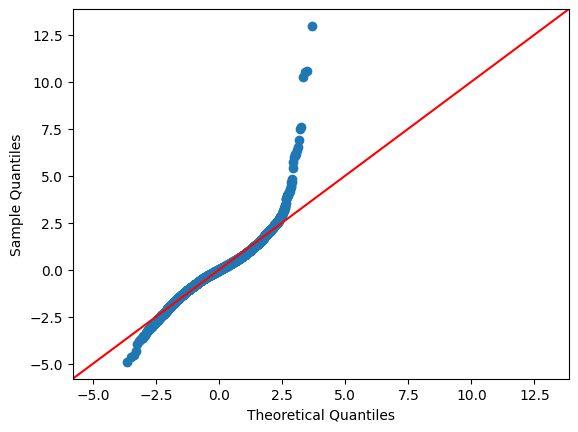

In [ ]:
import statsmodels.api as sm
error = y_pred_knn_train - y_train
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

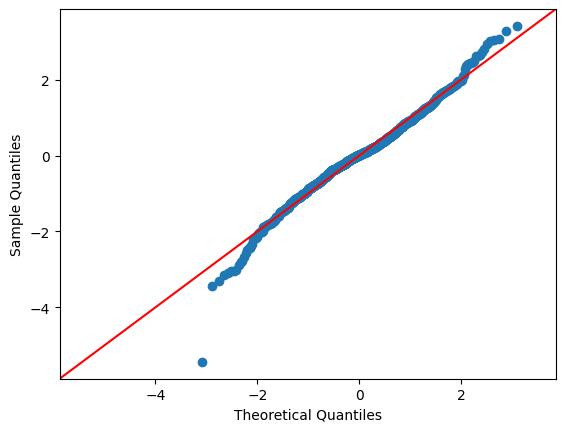

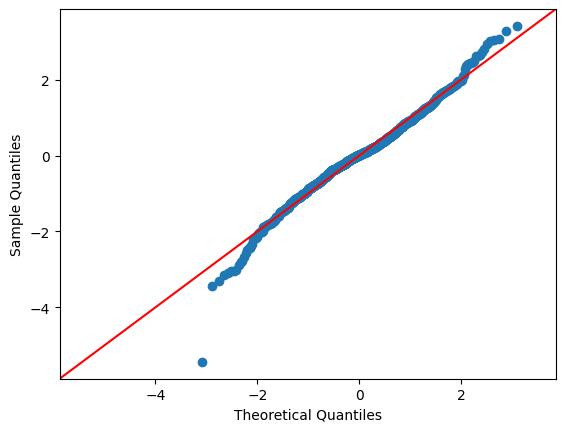

In [ ]:
error = y_pred_knn_test - y_test
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')